In [1]:
import sqlite3

In [2]:
#Connect to SQLite database 
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


In [3]:
#Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [5]:
sample_data = [
    ('Shampoo', 10, 150.0),
    ('Soap', 20, 40.0),
    ('Toothpaste', 15, 60.0),
    ('Shampoo', 5, 150.0),
    ('Soap', 10, 40.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

print("Sample sales_data.db created with sample records.")

Sample sales_data.db created with sample records.


In [6]:
import sqlite3
import pandas as pd
#Connect to the existing database
conn = sqlite3.connect("sales_data.db")

In [7]:
#SQL query
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Run query load into pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Display the results
print("Sales Summary:")
print(df)

Sales Summary:
      product  total_qty  revenue
0     Shampoo         15   2250.0
1        Soap         30   1200.0
2  Toothpaste         15    900.0


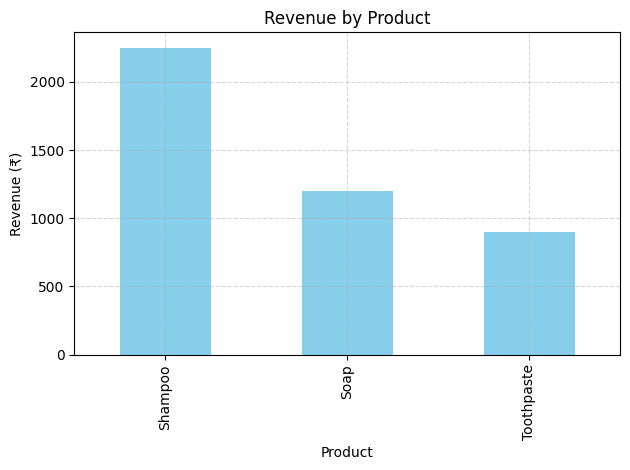

In [11]:
import matplotlib.pyplot as plt

# Create a bar chart: Product vs Revenue
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.tight_layout()  # Adjust layout to fit labels
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()
